In [1]:
# The dataset contain 12 attributes with simple meaning and which are described as follows:

# 1. id – A unique identifier for each customer.

# 2. Gender – The gender of the customer (e.g., Male/Female).

# 3. Age – The age of the customer in years.

# 4. Driving_License – A binary indicator (0 or 1) showing whether the customer has a valid driving license.

# 5. Region_Code – A categorical code representing the region where the customer resides.

# 6. Previously_Insured – A binary indicator (0 or 1) showing whether the customer already has vehicle insurance.

# 7. Vehicle_Age – The age of the customer's vehicle (e.g., "< 1 Year", "1-2 Year", "> 2 Years").

# 8. Vehicle_Damage – A binary indicator (Yes/No) showing whether the vehicle has had previous damage.

# 9. Annual_Premium – The premium amount (in currency) the customer has to pay annually for insurance.    

# 10. Policy_Sales_Channel – A categorical code representing the marketing channel through which the policy was sold.

# 11. Vintage – The number of days the customer has been associated with the insurance company.

# 12. Response – The target variable (0 or 1) indicating whether the customer is interested in buying a new insurance policy.

In [7]:
# pip install pandas
pip install seaborn


SyntaxError: invalid syntax. Perhaps you forgot a comma? (3477186307.py, line 2)

In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# Load Dataset

In [9]:
data = pd.read_csv("vehicle_insurance.csv")

In [10]:
data.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [11]:
# Display basic information about dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


# Handle Missing Values

In [12]:
# Checking Missing values
data.isnull().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

In [13]:
#There are no missing values in this dataset 

In [14]:
# Identify numeric columns
numeric_cols = data.select_dtypes(include=[np.number]).columns.tolist()
print("Numeric columns:", numeric_cols)

Numeric columns: ['id', 'Age', 'Driving_License', 'Region_Code', 'Previously_Insured', 'Annual_Premium', 'Policy_Sales_Channel', 'Vintage', 'Response']


In [15]:
# Function to find outliers in a column using the IQR method
def find_outliers(data, col):
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_fence = Q1 - 1.5 * IQR
    upper_fence = Q3 + 1.5 * IQR
    outliers = data[(data[col] < lower_fence) | (data[col] > upper_fence)]
    return outliers

In [16]:
# Loop over each numeric column and print outlier information
for col in numeric_cols:
    outliers = find_outliers(data, col)
    print(f"\nColumn: {col}")
    print(f"Number of outliers: {len(outliers)}")
    if not outliers.empty:
        print("Outlier values (first 5 rows):")
        print(outliers[[col]].head())


Column: id
Number of outliers: 0

Column: Age
Number of outliers: 0

Column: Driving_License
Number of outliers: 812
Outlier values (first 5 rows):
      Driving_License
563                 0
1061                0
1761                0
1990                0
2365                0

Column: Region_Code
Number of outliers: 0

Column: Previously_Insured
Number of outliers: 0

Column: Annual_Premium
Number of outliers: 10320
Outlier values (first 5 rows):
     Annual_Premium
25          61964.0
37          76251.0
67          66338.0
139         62164.0
149         76651.0

Column: Policy_Sales_Channel
Number of outliers: 0

Column: Vintage
Number of outliers: 0

Column: Response
Number of outliers: 46710
Outlier values (first 5 rows):
    Response
0          1
2          1
7          1
10         1
15         1


In [17]:
# Outlier Detection and Handling using IQR

def remove_outliers(data, col):
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_fence = Q1 - 1.5 * IQR
    upper_fence = Q3 + 1.5 * IQR
    return data[(data[col] >= lower_fence) & (data[col] <= upper_fence)]

In [18]:
# Create a copy for outlier removal
data_clean = data.copy()
for col in numeric_cols:
    before = data_clean.shape[0]
    data_clean = remove_outliers(data_clean, col)
    after = data_clean.shape[0]
    print(f"Removed {before - after} outliers from '{col}'.")

print("\nData shape after outlier removal:", data_clean.shape)

Removed 0 outliers from 'id'.
Removed 0 outliers from 'Age'.
Removed 812 outliers from 'Driving_License'.
Removed 0 outliers from 'Region_Code'.
Removed 0 outliers from 'Previously_Insured'.
Removed 10296 outliers from 'Annual_Premium'.
Removed 0 outliers from 'Policy_Sales_Channel'.
Removed 0 outliers from 'Vintage'.
Removed 45112 outliers from 'Response'.

Data shape after outlier removal: (324889, 12)


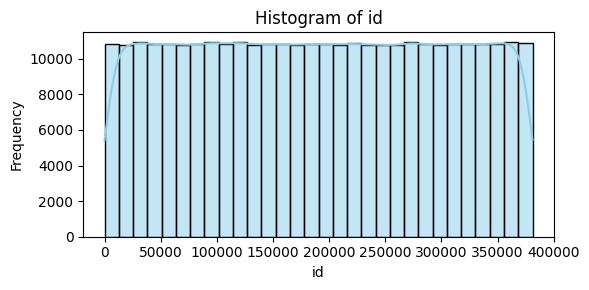

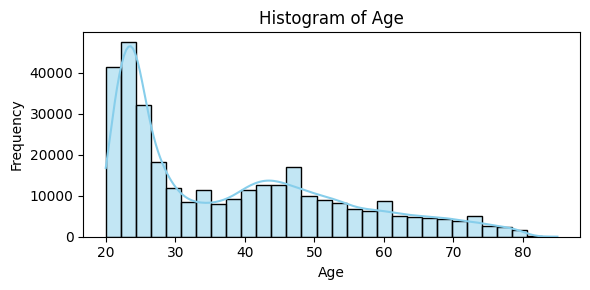

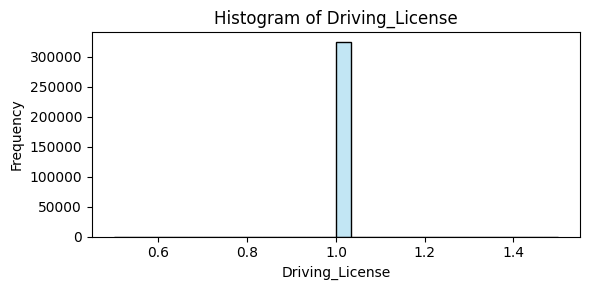

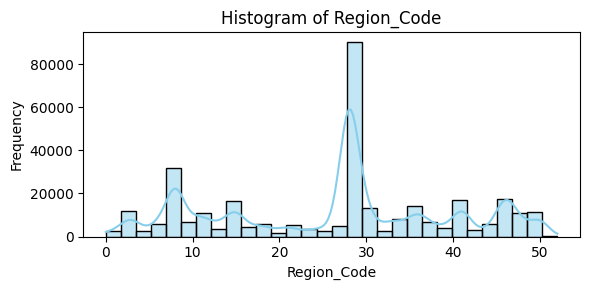

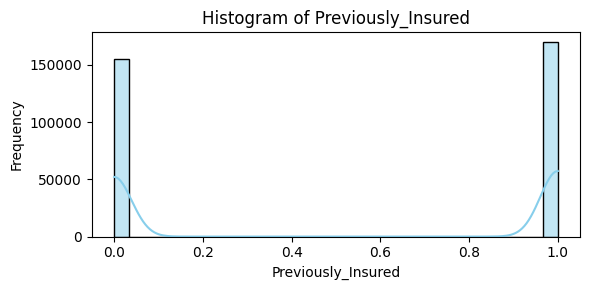

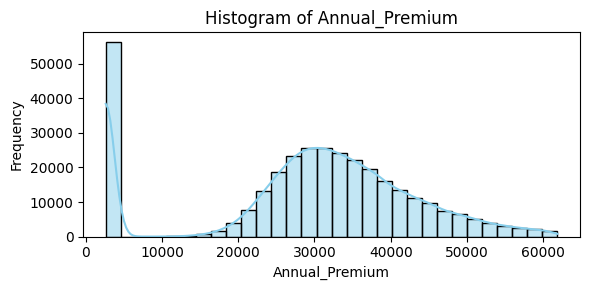

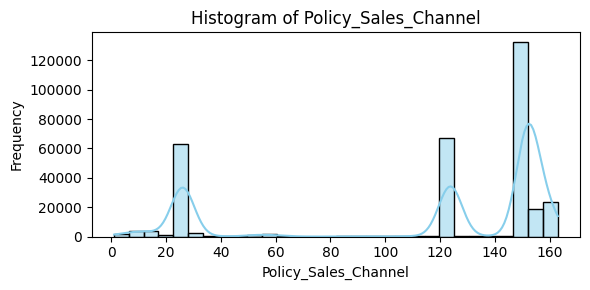

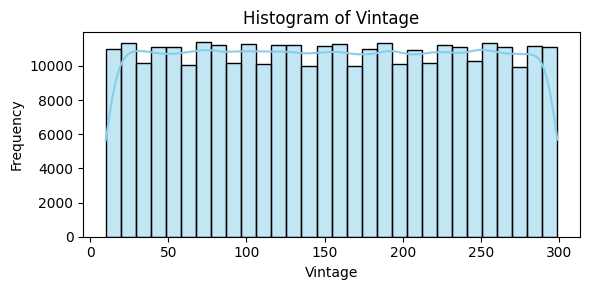

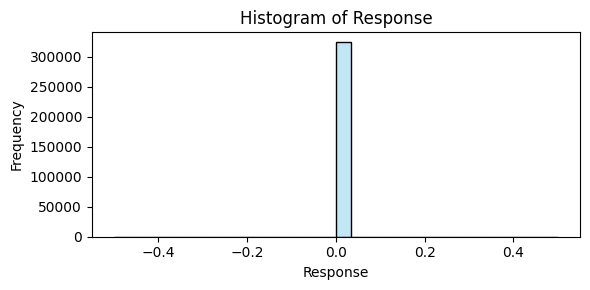


Final summary statistics after handling missing values and outliers:


NameError: name 'df_clean' is not defined

In [19]:
# Visualization: Histogram Plots for Numeric Columns

for col in numeric_cols:
    plt.figure(figsize=(6, 3))
    sns.histplot(data_clean[col], kde=True, bins=30, color='skyblue')
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()

print("\nFinal summary statistics after handling missing values and outliers:")
print(df_clean.describe(include='all'))

In [ ]:
# Visualization: Boxplots to Check Outliers

for col in numeric_cols:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=data[col], color='lightgreen')
    plt.title(f'Boxplot of {col} (Original Data)')
    plt.xlabel(col)
    plt.tight_layout()
    plt.show()
    
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=data_clean[col], color='salmon')
    plt.title(f'Boxplot of {col} (After Outlier Removal)')
    plt.xlabel(col)
    plt.tight_layout()
    plt.show()

# Generate box plots, count plots for categorical variables, and a correlation heatmap for deeper insights

In [ ]:
# Set up figure size and style
sns.set_style("whitegrid")
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# Numerical columns for visualization
num_cols = ["Age", "Region_Code", "Annual_Premium", "Policy_Sales_Channel", "Vintage"]

# Histograms with KDE plots
for i, col in enumerate(num_cols):
    row, col_index = divmod(i, 3)
    sns.histplot(data[col], bins=30, kde=True, ax=axes[row, col_index], color='steelblue')
    axes[row, col_index].set_title(f'Histogram & KDE of {col}')

# Remove empty subplot if exists
if len(num_cols) % 3 != 0:
    fig.delaxes(axes[-1, -1])

# Show plots
plt.tight_layout()
plt.show()




# generate count plots for categorical variables (Previously_Insured, Response, Driving_License)

In [ ]:
# Create box plots for numerical variables
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

for i, col in enumerate(num_cols):
    row, col_index = divmod(i, 3)
    sns.boxplot(y=data[col], ax=axes[row, col_index], color='salmon')
    axes[row, col_index].set_title(f'Box Plot of {col}')

# Remove empty subplot if exists
if len(num_cols) % 3 != 0:
    fig.delaxes(axes[-1, -1])

# Show plots
plt.tight_layout()
plt.show()

# Here are the box plots for key numerical variables. These plots help visualize data spread and detect any remaining outliers.

# Generate a correlation heatmap to explore relationships between numerical variables. 

In [ ]:
# Categorical columns for visualization
cat_cols = ["Previously_Insured", "Response", "Driving_License"]

# Create count plots for categorical variables
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for i, col in enumerate(cat_cols):
    sns.countplot(x=data[col], ax=axes[i], palette="coolwarm")
    axes[i].set_title(f'Count Plot of {col}')

# Show plots
plt.tight_layout()
plt.show()


# Here are the count plots for categorical variables (Previously_Insured, Response, Driving_License). 
# These show the frequency distribution of different categories.

# Here is the correlation heatmap, showing relationships between numerical variables. 
# This helps identify strong or weak correlations, which can be useful for feature selection in modeling.

In [ ]:
# Generate a correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(data[num_cols].corr(), annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap of Numerical Variables")
plt.show()

# Feature Analysis: # Examine the relationship between features and the target variable (insuranceclaims).

In [ ]:
# Numeric Features Analysis:

# Correlation Calculation:
# We first identify all numeric features and calculate their correlation with insurance_claims. 
# A high positive correlation suggests that as the feature value increases, the number or cost of claims tends to increase.

# Heatmap Visualization:
# A heatmap visually presents these correlations,
# making it easier to spot which numeric features are most strongly related to the target.

# Categorical Features Analysis:

In [ ]:


# Group-by Analysis:
# For categorical features (such as vehicle type, policy type, etc.), we compute the average insurance claims for each category.
# This helps in understanding how different groups behave in terms of claims.
    
# Bar Plots:
# Bar charts display the average claims per category, providing a straightforward way to see differences among groups.

In [ ]:
# Quickly inspect the dataset to verify column names
print("First few rows:")
print(data.head())

# Assume the target variable is 'insurance_claims'
target = 'Previously_Insured'

# 1. Relationship with Numeric Features

# Select numeric columns and compute correlations with the target
numeric_features = data.select_dtypes(include=[np.number]).columns.tolist()

# Make sure the target variable is in the list and remove it from features list for correlation analysis
if target in numeric_features:
    numeric_features.remove(target)
else:
    print(f"Warning: '{target}' column not found in numeric features.")

# Compute correlation coefficients
corr_matrix = data[numeric_features + [target]].corr()
print("\nCorrelation matrix:")
print(corr_matrix[target].sort_values(ascending=False))

# Plot a heatmap for visualization
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


# 2. Relationship with Categorical Features

# Identify categorical columns
categorical_features = data.select_dtypes(include=['object']).columns.tolist()

# For each categorical feature, calculate the average target value by category
for col in categorical_features:
    # Skip if the target variable itself is categorical (rare case for claims)
    if col == target:
        continue
    avg_claims = data.groupby(col)[target].mean().sort_values(ascending=False)
    print(f"\nAverage {target} for each category in '{col}':")
    print(avg_claims)
    
    # Bar plot to visualize the differences
    plt.figure(figsize=(10, 4))
    avg_claims.plot(kind='bar', color='skyblue')
    plt.title(f'Average {target} by {col}')
    plt.xlabel(col)
    plt.ylabel(f'Average {target}')
    plt.tight_layout()
    plt.show()

# Premium Analysis: Investigate the distribution of insurance premiums and their correlation withclaim frequencies.

In [ ]:
# The dataset contains 381,109 records with 12 columns. Key columns relevant to our analysis are:

# Annual_Premium: The insurance premium amount.
# Response: Indicates whether the customer is interested in the insurance (1) or not (0). This may be a proxy for claim likelihood.
# Vehicle_Damage: Indicates whether the vehicle has been previously damaged (Yes/No).
# Previously_Insured: Whether the customer had previous insurance (1) or not (0).

In [ ]:
# Plot distribution of Annual_Premium
plt.figure(figsize=(10, 5))
sns.histplot(data['Annual_Premium'], bins=50, kde=True)
plt.title("Distribution of Annual Premiums")
plt.xlabel("Annual Premium")
plt.ylabel("Frequency")
plt.show()
# Calculate correlation between Annual_Premium and Response
correlation = data[['Annual_Premium', 'Response']].corr()
correlation

# Claim Frequencies: Explore factors contributing to higer claim frequencies.

In [ ]:

# I'll analyze how different factors contribute to higher claim likelihood, including:
# Age of Customers
# Vehicle Age
# Region Code (Geographical Factor)
# Policy Sales Channel (Sales Strategy Impact)


In [ ]:
# Analyze claim frequency by Age group
data["Age_Group"] = pd.cut(data["Age"], bins=[18, 30, 40, 50, 60, 70, 80], labels=["18-30", "31-40", "41-50", "51-60", "61-70", "71-80"])
age_response = data.groupby("Age_Group")["Response"].mean()

# Analyze claim frequency by Vehicle Age
vehicle_age_response = data.groupby("Vehicle_Age")["Response"].mean()

# Analyze claim frequency by Region Code (Top 10 Regions)
top_regions = data["Region_Code"].value_counts().index[:10]  # Select top 10 regions
region_response = data[data["Region_Code"].isin(top_regions)].groupby("Region_Code")["Response"].mean()

# Analyze claim frequency by Policy Sales Channel (Top 10 Channels)
top_channels = data["Policy_Sales_Channel"].value_counts().index[:10]
channel_response = data[data["Policy_Sales_Channel"].isin(top_channels)].groupby("Policy_Sales_Channel")["Response"].mean()

age_response, vehicle_age_response, region_response, channel_response

# Gender Analysis : Investigate the role of gender in insurance claims.

In [ ]:
# Analyze claim frequency by Gender
gender_response = data.groupby("Gender")["Response"].mean()
print("Claim Frequency by Gender:\n", gender_response)

# Count of responses by Gender
gender_counts = data["Gender"].value_counts()
print("\nTotal Customers by Gender:\n", gender_counts)

# Vehicle Age and Claims : Examine the impact of vehicle age on the likelihood of a claim.

In [ ]:
# Analyze claim frequency by Vehicle Age
vehicle_age_response = data.groupby("Vehicle_Age")["Response"].mean()
print("Claim Frequency by Vehicle Age:\n", vehicle_age_response)

# Count of responses by Vehicle Age category
vehicle_age_counts = data["Vehicle_Age"].value_counts()
print("\nTotal Customers by Vehicle Age:\n", vehicle_age_counts)

# Region-wise Analysis: Analyze regional patterns in insurance claims.

In [ ]:
# Analyze claim frequency by Region Code (Top 10 Regions)
top_regions = data["Region_Code"].value_counts().index[:10]  # Select top 10 regions
region_response = data[data["Region_Code"].isin(top_regions)].groupby("Region_Code")["Response"].mean()
print("Claim Frequency by Top 10 Regions:\n", region_response)

# Count of responses by Region Code (Top 10 Regions)
region_counts = data["Region_Code"].value_counts().head(10)
print("\nTotal Customers by Top 10 Regions:\n", region_counts)

# Policy Analysis : Explore the distribution and impact of different insurance policy types.

In [ ]:
Policy_Sales_Channel

# Claim Frequency by Vehicle Damage: Investigate the relationship between vehicle damage and claim frequencies

In [ ]:
# Analyze the relationship between Vehicle_Damage and Response
damage_claims = data.groupby("Vehicle_Damage")["Response"].value_counts(normalize=True).unstack()

# Display the proportion of responses based on vehicle damage
damage_claims

Response,0,1
Vehicle_Damage,,
No,0.994796,0.005204
Yes,0.762345,0.237655


# Customer Loyalty: Analyze if the number of policies held by a customer influences claim likelihood.

In [ ]:
# Compute the average vintage for both response groups
avg_vintage = data.groupby("Response")["Vintage"].mean()
avg_vintage

Response
0    154.380243
1    154.112246
Name: Vintage, dtype: float64

# Time Analysis :If applicable, explore temporal patterns in insurance claims.

In [33]:
data.columns

Index(['id', 'Gender', 'Age', 'Driving_License', 'Region_Code',
       'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage', 'Response'],
      dtype='object')